#Assessment: Exploring the Gapminder Dataset
Exercise 1. Life expectancy vs fertility - part 1


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



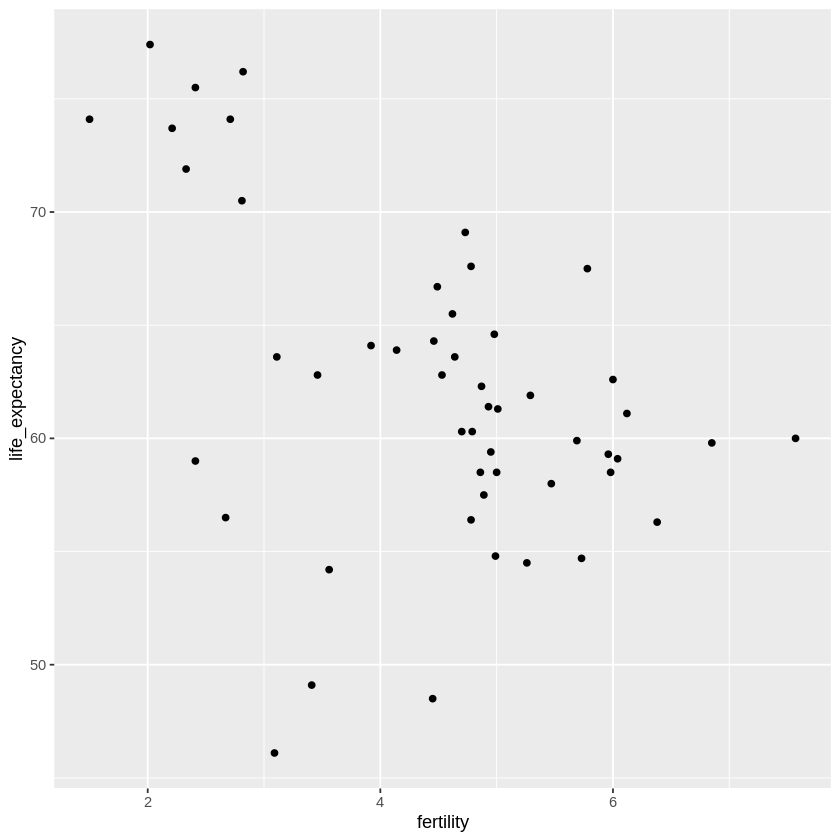

In [2]:
  install.packages("ggplot2")
  install.packages("dslabs")
  library(dplyr)
  library(ggplot2)
  library(dslabs)
  data(gapminder)
  ## fill out the missing parts in filter and aes
  gapminder %>% filter(continent=="Africa" & year ==2012) %>%
    ggplot(aes(fertility,life_expectancy)) +
    geom_point()

Exercise 2. Life expectancy vs fertility - part 2 - coloring your plot

Note that there is quite a bit of variability in life expectancy and fertility with some **African** countries having very high life expectancies. There also appear to be three clusters in the plot.

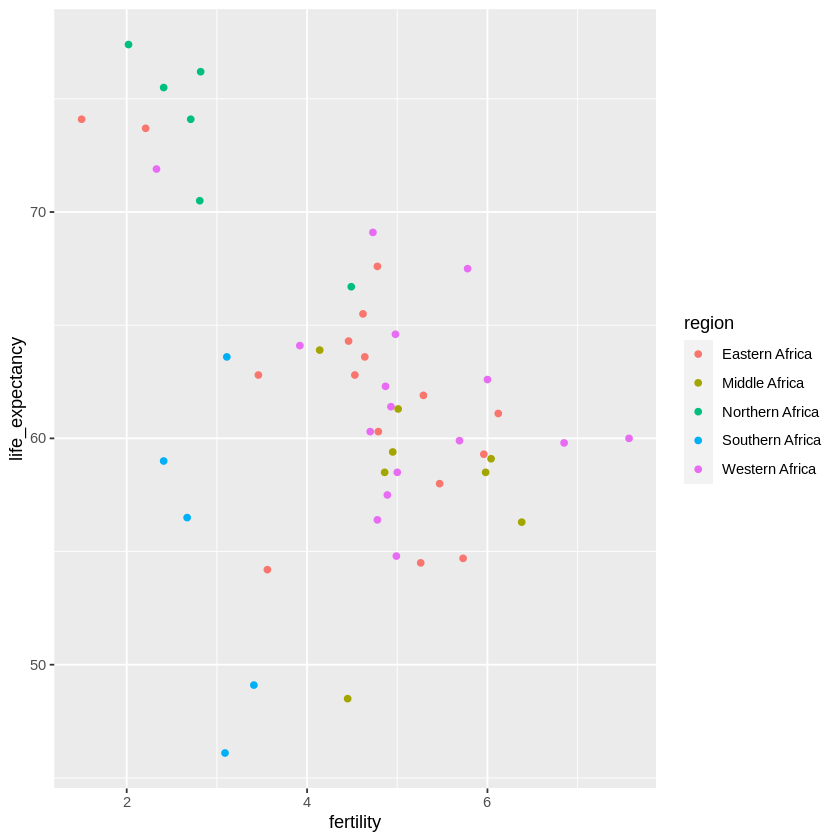

In [3]:
gapminder %>% filter(continent=="Africa" & year=="2012") %>% 
ggplot(aes(fertility,life_expectancy, color=region))+geom_point()

Exercise 3. Life expectancy vs fertility - part 3 - selecting country and region

While many of the countries in the high life expectancy/low fertility cluster are from Northern Africa, three countries are not.

- Create a table showing the country and region for the African countries (use select) that in 2012 had fertility rates of 3 or less and life expectancies of at least 70.
- Assign your result to a data frame called df

In [8]:
df <- gapminder %>% 
filter(continent == "Africa"&year=="2012" & fertility <=3 & life_expectancy>=70) %>%
 select(country,region)
df

country,region
<fct>,<fct>
Algeria,Northern Africa
Cape Verde,Western Africa
Egypt,Northern Africa
Libya,Northern Africa
Mauritius,Eastern Africa
Morocco,Northern Africa
Seychelles,Eastern Africa
Tunisia,Northern Africa


Exercise 4. Life expectancy and the Vietnam War - part 1

The Vietnam War lasted from 1955 to 1975. Do the data support war having a negative effect on life expectancy? We will create a time series plot that covers the period from 1960 to 2010 of life expectancy for Vietnam and the United States, using color to distinguish the two countries. In this start we start the analysis by generating a table.

- Use filter to create a table with data for the years from 1960 to 2010 in Vietnam and the United States.
- Save the table in an object called tab.


In [9]:
tab <- gapminder %>% 
filter(year>=1960 & year<=2010 & country%in%c("Vietnam","United States"))
head(tab)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,United States,1960,25.9,69.91,3.67,186176524,2.479391e+12,Americas,Northern America
2,Vietnam,1960,75.6,58.52,6.35,32670623,NA,Asia,South-Eastern Asia
3,United States,1961,25.4,70.32,3.63,189077076,2.536417e+12,Americas,Northern America
4,Vietnam,1961,72.6,59.17,6.39,33666768,NA,Asia,South-Eastern Asia
5,United States,1962,24.9,70.21,3.48,191860710,2.691139e+12,Americas,Northern America
6,Vietnam,1962,69.9,59.82,6.43,34684164,NA,Asia,South-Eastern Asia


Exercise 5. Life expectancy and the Vietnam War - part 2

Now that you have created the data table in Exercise 4, it is time to plot the data for the two countries.
- Use geom_line to plot life expectancy vs year for Vietnam and the United States and save the plot as p. The data table is stored in tab.
- Use color to distinguish the two countries.
- Print the object p


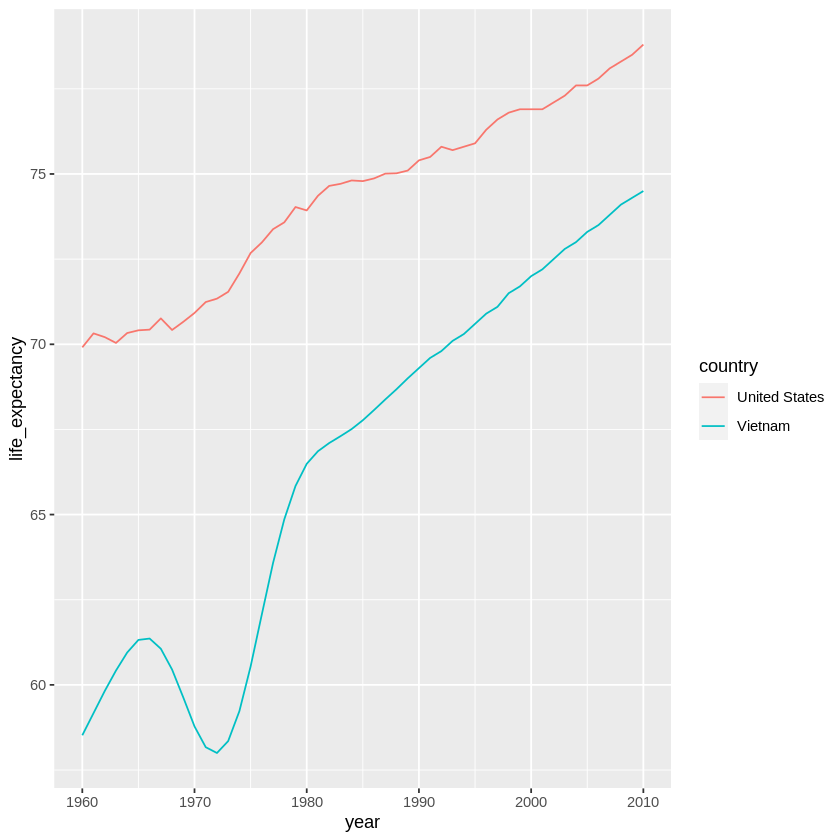

In [10]:
p <- tab %>% ggplot(aes(year,life_expectancy,color=country)) +geom_line()
p

Exercise 6. Life expectancy in Cambodia

Cambodia was also involved in this conflict and, after the war, Pol Pot and his communist Khmer Rouge took control and ruled Cambodia from 1975 to 1979. He is considered one of the most brutal dictators in history. Do the data support this claim?

- Use a single line of code to create a time series plot from 1960 to 2010 of life expectancy vs year for Cambodia.

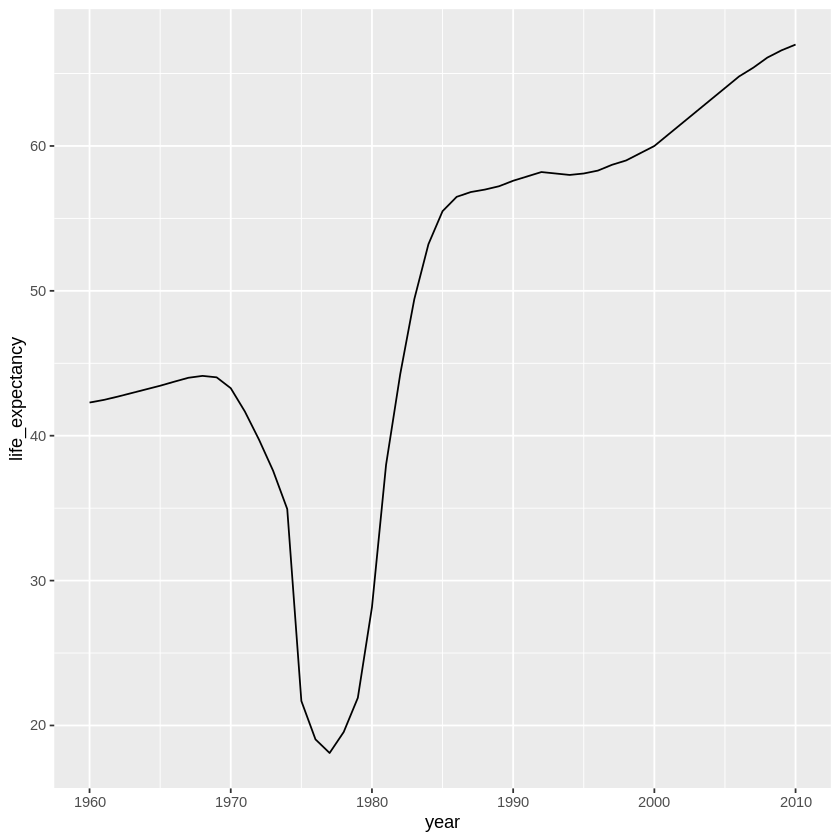

In [11]:
gapminder %>% filter(year>=1960 & year <= 2010 & country=="Cambodia") %>% 
ggplot(aes(year,life_expectancy)) + geom_line()

Exercise 7. Dollars per day - part 1

Now we are going to calculate and plot dollars per day for African countries in 2010 using GDP data.

In the first part of this analysis, we will create the dollars per day variable.

- Use mutate to create a dollars_per_day variable, which is defined as gdp/population/365.
- Create the dollars_per_day variable for African countries for the year 2010.
- Remove any NA values.
- Save the mutated dataset as daydollars

In [12]:
daydollars <- gapminder%>%mutate(dollars_per_day=gdp/population/365)%>% 
filter(year==2010 & continent=="Africa" & !is.na(dollars_per_day))
head(daydollars)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,dollars_per_day
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,Algeria,2010,23.5,76.0,2.82,36036159,79164339611,Africa,Northern Africa,6.0186382
2,Angola,2010,109.6,57.6,6.22,21219954,26125663270,Africa,Middle Africa,3.3731063
3,Benin,2010,71.0,60.8,5.10,9509798,3336801340,Africa,Western Africa,0.9613161
4,Botswana,2010,39.8,55.6,2.76,2047831,8408166868,Africa,Southern Africa,11.2490111
5,Burkina Faso,2010,69.7,59.0,5.87,15632066,4655655008,Africa,Western Africa,0.8159650
6,Burundi,2010,63.8,60.4,6.30,9461117,1158914103,Africa,Eastern Africa,0.3355954


Exercise 8. Dollars per day - part 2

Now we are going to calculate and plot dollars per day for African countries in 2010 using GDP data.

In the second part of this analysis, we will plot the smooth density plot using a log (base 2) x axis.
- The dataset including the dollars_per_day variable is preloaded as daydollars.
- Create a smooth density plot of dollars per day from daydollars.
- Use scale_x_continuous to change the x-axis to a log (base 2) scale.

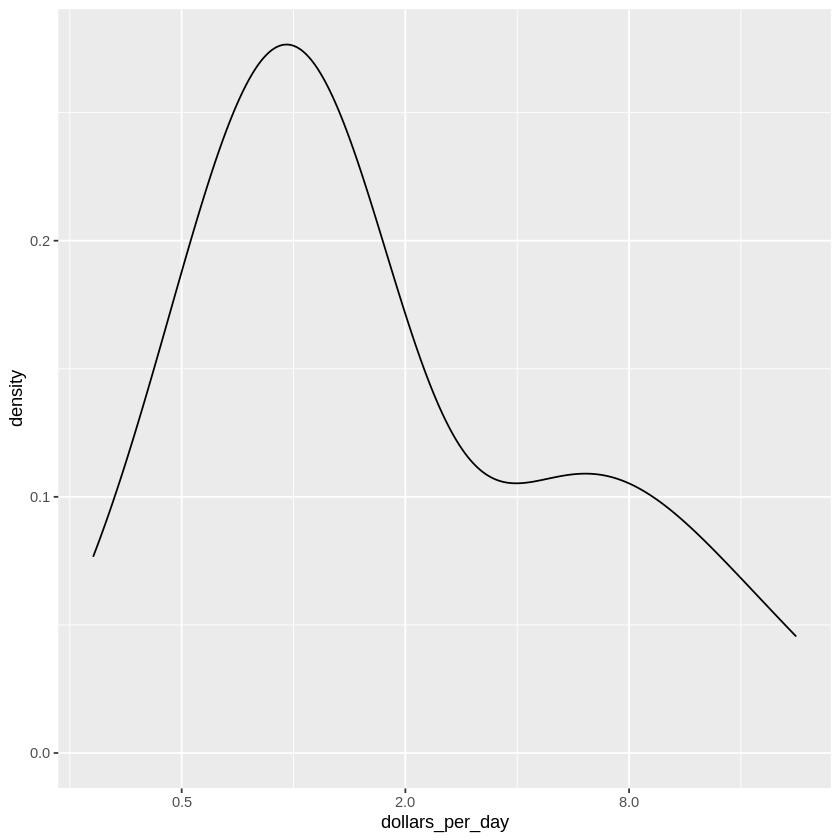

In [13]:
daydollars %>% ggplot(aes(dollars_per_day))+ 
geom_density()+scale_x_continuous(trans="log2")

Exercise 9. Dollars per day - part 3 - multiple density plots

Now we are going to combine the plotting tools we have used in the past two exercises to create density plots for multiple years.
- Create the dollars_per_day variable as in Exercise 7, but for African countries in the years 1970 and 2010 this time.
- Make sure you remove any NA values.
- Create a smooth density plot of dollars per day for 1970 and 2010 using a log (base 2) scale for the x axis.
- Use facet_grid to show a different density plot for 1970 and 2010.

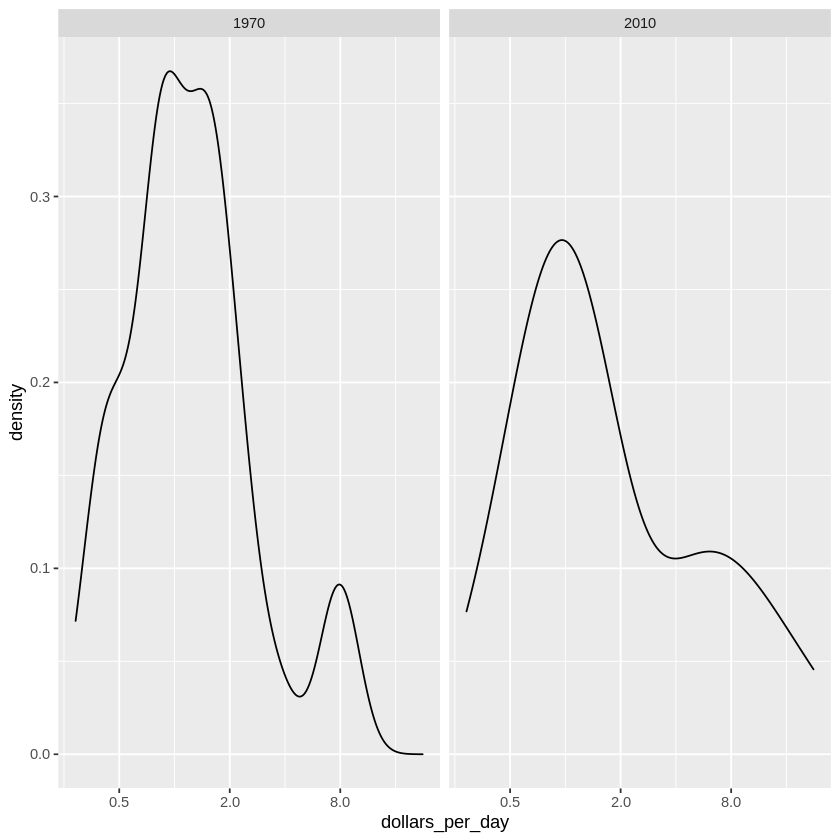

In [15]:
daydollars <- gapminder %>% mutate(dollars_per_day=gdp/population/365)%>%
filter(year %in% c(1970,2010) & continent=="Africa" & !is.na(dollars_per_day))

daydollars %>% ggplot(aes(dollars_per_day)) + 
geom_density() + 
scale_x_continuous(trans='log2') + 
facet_grid(.~year)

Exercise 10. Dollars per day - part 4 - stacked density plot

Now we are going to edit the code from Exercise 9 to show a stacked density plot of each region in Africa.
- Much of the code will be the same as in Exercise 9:
    - Create the dollars_per_day variable as in Exercise 7, but for African countries in the years 1970 and 2010 this time.
    - Make sure you remove any NA values.
Create a smooth density plot of dollars per day for 1970 and 2010 using a log (base 2) scale for the x axis.
    - Use facet_grid to show a different density plot for 1970 and 2010.
- Make sure the densities are smooth by using bw = 0.5.
- Use the fill and position arguments where appropriate to create the stacked density plot of each region.

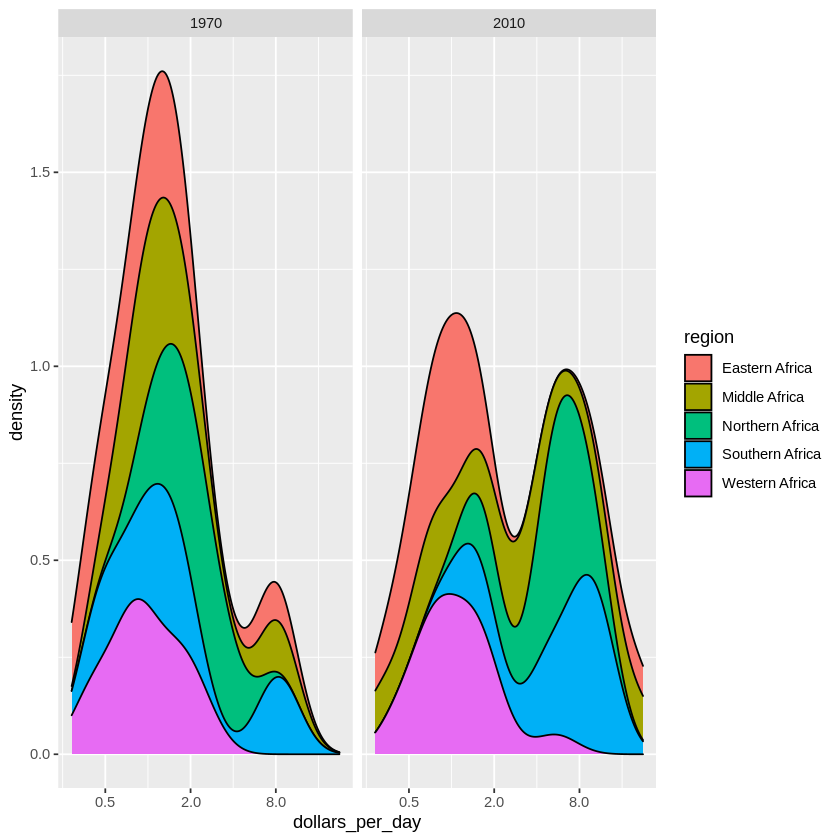

In [16]:
daydollars <- gapminder %>% 
mutate(dollars_per_day=gdp/population/365)%>% 
filter(year %in% c(1970,2010) & continent=="Africa" & !is.na(dollars_per_day))

daydollars %>% ggplot(aes(dollars_per_day,fill = region)) +
 geom_density(bw=0.5,position='stack') + 
 scale_x_continuous(trans='log2') + 
 facet_grid(.~year)

Exercise 11. Infant mortality scatter plot - part 1

We are going to continue looking at patterns in the gapminder dataset by plotting infant mortality rates versus dollars per day for African countries.

- Generate dollars_per_day using mutate and filter for the year 2010 for African countries.
    - Remember to remove NA values.
- Store the mutated dataset in gapminder_Africa_2010.
- Make a scatter plot of infant_mortality versus dollars_per_day for countries in the African continent.
- Use color to denote the different regions of Africa.

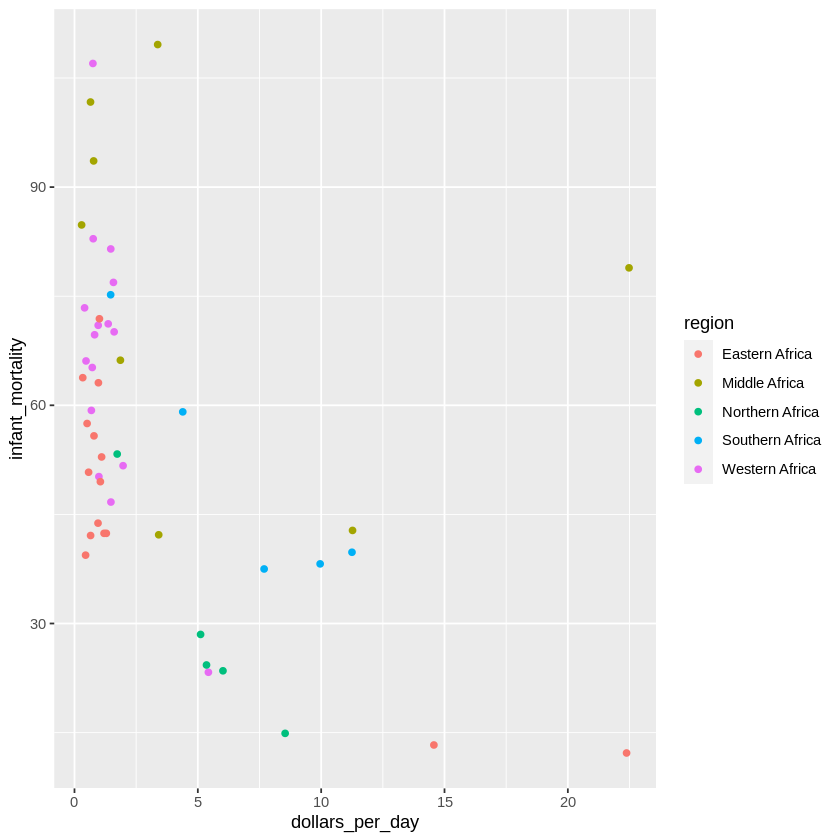

In [17]:
gapminder_Africa_2010 <- daydollars <- gapminder %>% 
mutate(dollars_per_day=gdp/population/365)%>% 
filter(year %in% c(2010) & continent=="Africa" & !is.na(dollars_per_day))

# now make the scatter plot
gapminder_Africa_2010 %>% 
ggplot(aes(dollars_per_day,infant_mortality,color = region)) + 
geom_point()

Exercise 12. Infant mortality scatter plot - part 2 - logarithmic axis

Now we are going to transform the x axis of the plot from the previous exercise.

- The mutated dataset is preloaded as gapminder_Africa_2010.
- As in the previous exercise, make a scatter plot of infant_mortality versus dollars_per_day for countries in the African continent.
- As in the previous exercise, use color to denote the different regions of Africa.
- Transform the x axis to be in the log (base 2) scale.

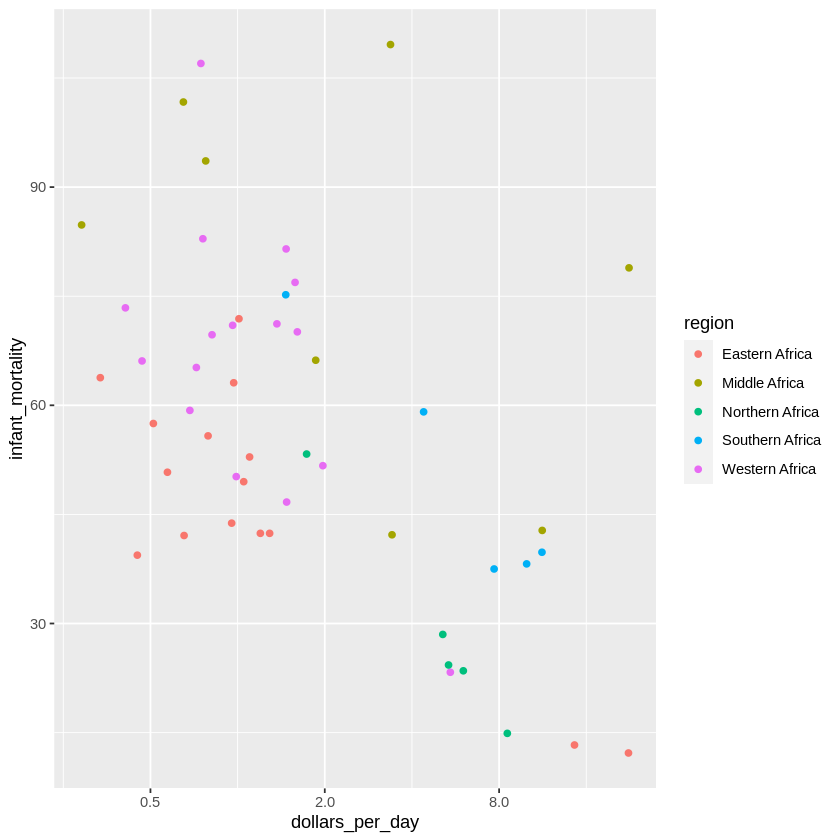

In [18]:
gapminder_Africa_2010 %>% 
ggplot(aes(dollars_per_day,infant_mortality,color=region))+
geom_point()+
scale_x_continuous(trans='log2')

Exercise 13. Infant mortality scatter plot - part 3 - adding labels

Note that there is a large variation in infant mortality and dollars per day among African countries.

As an example, one country has infant mortality rates of less than 20 per 1000 and dollars per day of 16, while another country has infant mortality rates over 10% and dollars per day of about 1.

In this exercise, we will remake the plot from Exercise 12 with country names instead of points so we can identify which countries are which.

- The mutated dataset is preloaded as gapminder_Africa_2010.
- As in the previous exercise, make a scatter plot of infant_mortality versus dollars_per_day for countries in the African continent.
- As in the previous exercise, use color to denote the different regions of Africa.
- As in the previous exercise, transform the x axis to be in the log (base 2) scale.
- Add a geom_text layer to display country names in addition to of points.

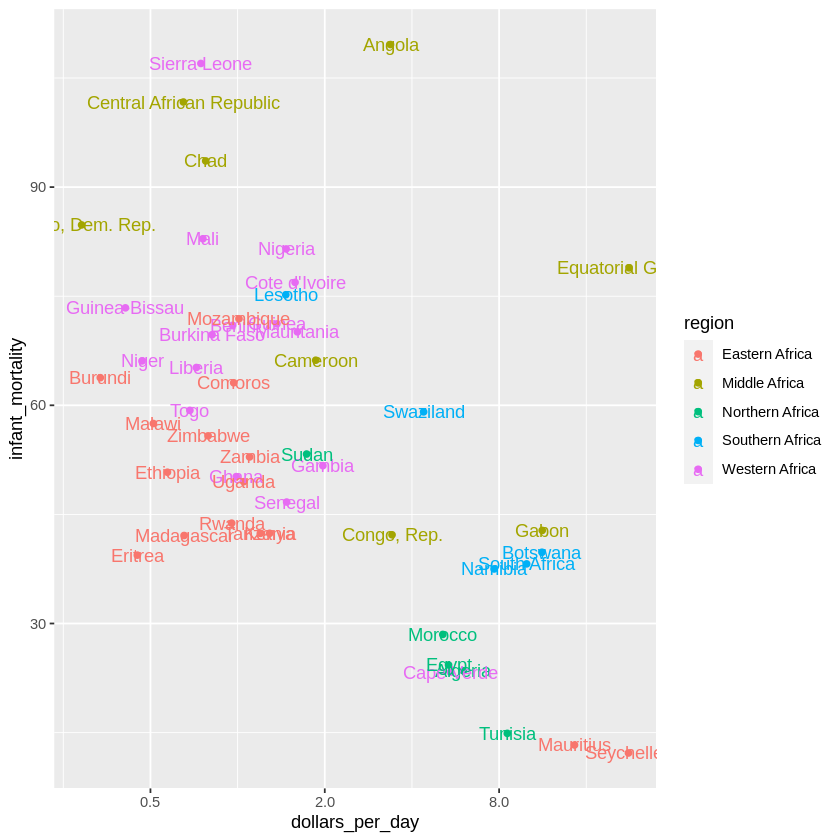

In [19]:
gapminder_Africa_2010 %>%
ggplot(aes(dollars_per_day,infant_mortality, color=region,label = country)) + 
geom_point() + 
scale_x_continuous(trans='log2') +
 geom_text()

Exercise 14. Infant mortality scatter plot - part 4 - comparison of scatter plots

Now we are going to look at changes in the infant mortality and dollars per day patterns African countries between 1970 and 2010.

- Generate dollars_per_day using mutate and filter for the years 1970 and 2010 for African countries.
- Remember to remove NA values.
- As in the previous exercise, make a scatter plot of infant_mortality versus dollars_per_day for countries in the African continent.
- As in the previous exercise, use color to denote the different regions of Africa.
- As in the previous exercise, transform the x axis to be in the log (base 2) scale.
- As in the previous exercise, add a layer to display country names instead of points.
- Use facet_grid to show different plots for 1970 and 2010. Align the plots vertically.

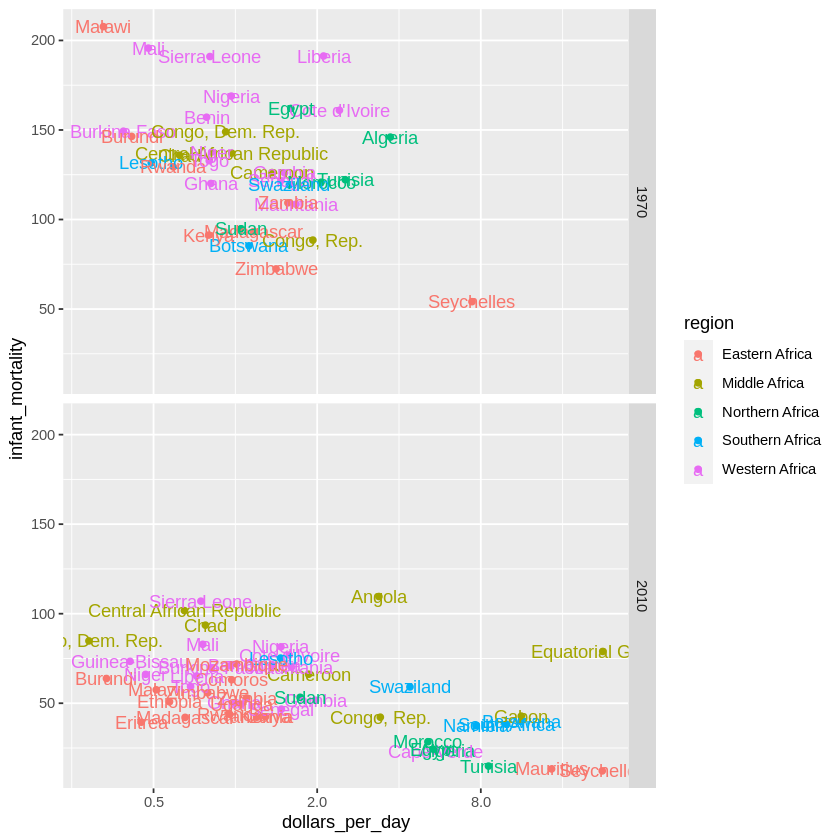

In [20]:
gapminder %>%
filter(continent =="Africa" &year%in% c(1970,2010)&!is.na(gdp) & !is.na(year) & !is.na(infant_mortality)) %>% 
mutate(dollars_per_day = gdp/population/365) %>%
ggplot(aes(dollars_per_day, infant_mortality, color = region,label = country)) +
geom_point() +
scale_x_continuous(trans = "log2") +
geom_text() +
facet_grid(year~.)
